📊 Market Summary
Green Stocks: 45
Red Stocks: 5
Average Market Price: 2449.42
Average Market Volume: 6833474


C:\Users\vicky\AppData\Local\Temp\ipykernel_28480\1782301291.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_green, x='yearly_return', y='symbol', palette='Greens_d')


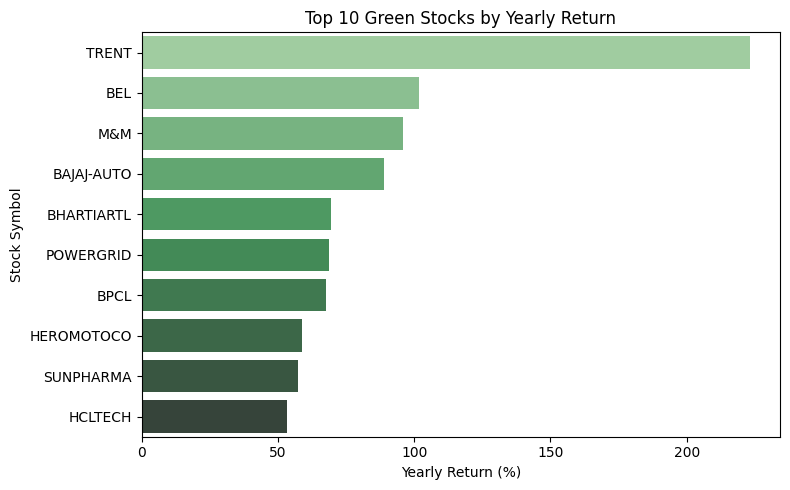

C:\Users\vicky\AppData\Local\Temp\ipykernel_28480\1782301291.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_loss, x='yearly_return', y='symbol', palette='Reds_d')


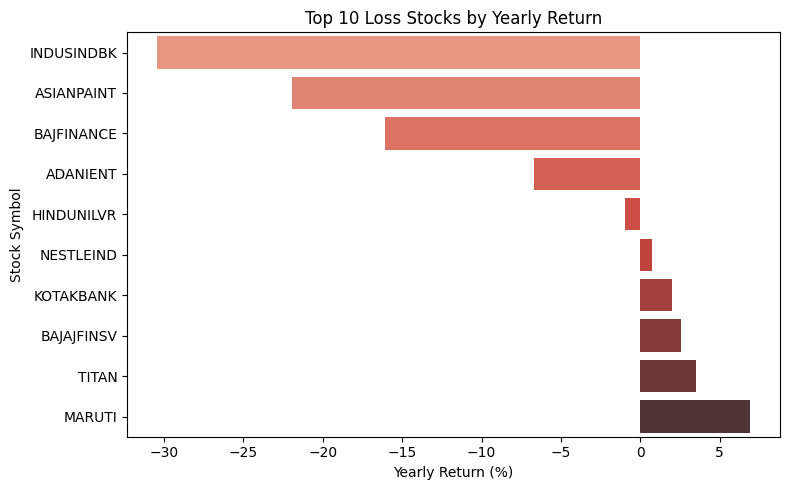

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

input_folder = r'D:\guvi\stock_analysis\cleaned_csv_output'

results = []

# Loop through each CSV file and process individually
for file in os.listdir(input_folder):
    if file.endswith('.csv'):
        filepath = os.path.join(input_folder, file)
        symbol = file.replace('.csv', '')

        df = pd.read_csv(filepath)
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
        df = df.sort_values('date')

        if df.empty or len(df) < 2:
            continue  # Skip files with insufficient data

        first_close = df.iloc[0]['close']
        last_close = df.iloc[-1]['close']
        avg_price = df['close'].mean()
        avg_volume = df['volume'].mean()
        yearly_return = ((last_close - first_close) / first_close) * 100

        results.append({
            'symbol': symbol,
            'first_close': first_close,
            'last_close': last_close,
            'yearly_return': yearly_return,
            'avg_price': avg_price,
            'avg_volume': avg_volume,
            'performance': 'Green' if yearly_return > 0 else 'Red'
        })

# Convert to DataFrame
summary_df = pd.DataFrame(results)

# Top 10 Green and Loss Stocks
top_green = summary_df.sort_values(by='yearly_return', ascending=False).head(10)
top_loss = summary_df.sort_values(by='yearly_return').head(10)

# Market Summary
green_count = (summary_df['performance'] == 'Green').sum()
red_count = (summary_df['performance'] == 'Red').sum()
avg_market_price = summary_df['avg_price'].mean()
avg_market_volume = summary_df['avg_volume'].mean()

# Print Market Summary
print("📊 Market Summary")
print(f"Green Stocks: {green_count}")
print(f"Red Stocks: {red_count}")
print(f"Average Market Price: {avg_market_price:.2f}")
print(f"Average Market Volume: {int(avg_market_volume)}")

# Plot Top 10 Green Stocks
plt.figure(figsize=(8,5))
sns.barplot(data=top_green, x='yearly_return', y='symbol', palette='Greens_d')
plt.title('Top 10 Green Stocks by Yearly Return')
plt.xlabel('Yearly Return (%)')
plt.ylabel('Stock Symbol')
plt.tight_layout()
plt.show()

# Plot Top 10 Loss Stocks
plt.figure(figsize=(8,5))
sns.barplot(data=top_loss, x='yearly_return', y='symbol', palette='Reds_d')
plt.title('Top 10 Loss Stocks by Yearly Return')
plt.xlabel('Yearly Return (%)')
plt.ylabel('Stock Symbol')
plt.tight_layout()
plt.show()
